# Boston Housing

## Load data

In [1]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()

## Preprocessing

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## Training

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge

grid_br = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4],
}

grid_dt = {
    'max_depth': range(1, X_train.shape[1] + 1, 5),
}

grid_rf = {
    'max_depth': range(1, X_train.shape[1] + 1, 5),
}

grid_gb = {
    'max_depth': range(1, X_train.shape[1] + 1, 5),
}

models_name = [
    "Bayesian Regression",
    "Decision Tree", 
    "Random Forest", 
    "Gradient Boosting"
]

grids = [
    grid_br,
    grid_dt, 
    grid_rf, 
    grid_gb
]

models = [
    BayesianRidge(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
]

cv = 5

In [5]:
from sklearn.model_selection import GridSearchCV
from utils import grid_search_by_hand, model_evaluation_lr
from copy import deepcopy

import warnings
warnings.filterwarnings("ignore")

results_gs = pd.DataFrame(columns=["Model", "MAPE", "RMSE", "r2"])
results_hand = pd.DataFrame(columns=["Model", "MAPE", "RMSE", "r2"])
models_gs_sc = {}
models_gs = {}

for i, (model_name, model, grid) in enumerate(zip(models_name, models, grids)):
    gs_sc = GridSearchCV(model, param_grid=grid, scoring='r2', cv=cv, n_jobs=-1)
    gs = GridSearchCV(model, param_grid=grid, scoring='r2', cv=cv, n_jobs=-1)
    hand_sc = grid_search_by_hand(deepcopy(model), grid, X_train_sc, y_train, cv, 'r2')
    hand = grid_search_by_hand(deepcopy(model), grid, X_train, y_train, cv, 'r2')

    gs_sc.fit(X_train_sc, y_train)
    gs.fit(X_train, y_train)
    models_gs[model_name] = gs
    models_gs_sc[model_name + ' (sc)'] = gs_sc
    hand_sc['best_model'].fit(X_train_sc, y_train)
    hand['best_model'].fit(X_train, y_train)

    eval_gs_sc = model_evaluation_lr(gs_sc, X_test_sc, y_test)
    eval_gs = model_evaluation_lr(gs, X_test, y_test)
    eval_hand_sc = model_evaluation_lr(hand_sc['best_model'], X_test_sc, y_test)
    eval_hand = model_evaluation_lr(hand['best_model'], X_test, y_test)

    results_gs.loc[2*i] = [model_name, eval_gs['mape'], eval_gs['rmse'], eval_gs['r2']]
    results_gs.loc[2*i+1] = [model_name + ' (sc)', eval_gs_sc['mape'], eval_gs_sc['rmse'], eval_gs_sc['r2']]
    results_hand.loc[2*i] = [model_name, eval_hand['mape'], eval_hand['rmse'], eval_hand['r2']]
    results_hand.loc[2*i+1] = [model_name + ' (sc)', eval_hand_sc['mape'], eval_hand_sc['rmse'], eval_hand_sc['r2']]

results_hand = results_hand.sort_values(by='r2', ascending=False)

ModuleNotFoundError: No module named 'utils'

## Results

### With GridSearch

In [6]:
results_gs = results_gs.sort_values(by='r2', ascending=False)
print(results_gs.to_string(index=False))

                   Model  MAPE  RMSE    r2
      Random Forest (sc) 0.103 3.150 0.867
           Random Forest 0.103 3.177 0.865
Bayesian Regression (sc) 0.120 3.528 0.833
      Decision Tree (sc) 0.137 3.723 0.814
     Bayesian Regression 0.129 3.734 0.813
       Gradient Boosting 0.129 3.754 0.811
  Gradient Boosting (sc) 0.129 3.754 0.811
           Decision Tree 0.147 4.167 0.767


### By hand

In [7]:
results_hand = results_gs.sort_values(by='r2', ascending=False)
print(results_hand.to_string(index=False))

                   Model  MAPE  RMSE    r2
      Random Forest (sc) 0.103 3.150 0.867
           Random Forest 0.103 3.177 0.865
Bayesian Regression (sc) 0.120 3.528 0.833
      Decision Tree (sc) 0.137 3.723 0.814
     Bayesian Regression 0.129 3.734 0.813
       Gradient Boosting 0.129 3.754 0.811
  Gradient Boosting (sc) 0.129 3.754 0.811
           Decision Tree 0.147 4.167 0.767


We obtain the same results by hand and with GridSearchCV so we only plot for GridSearchCV models

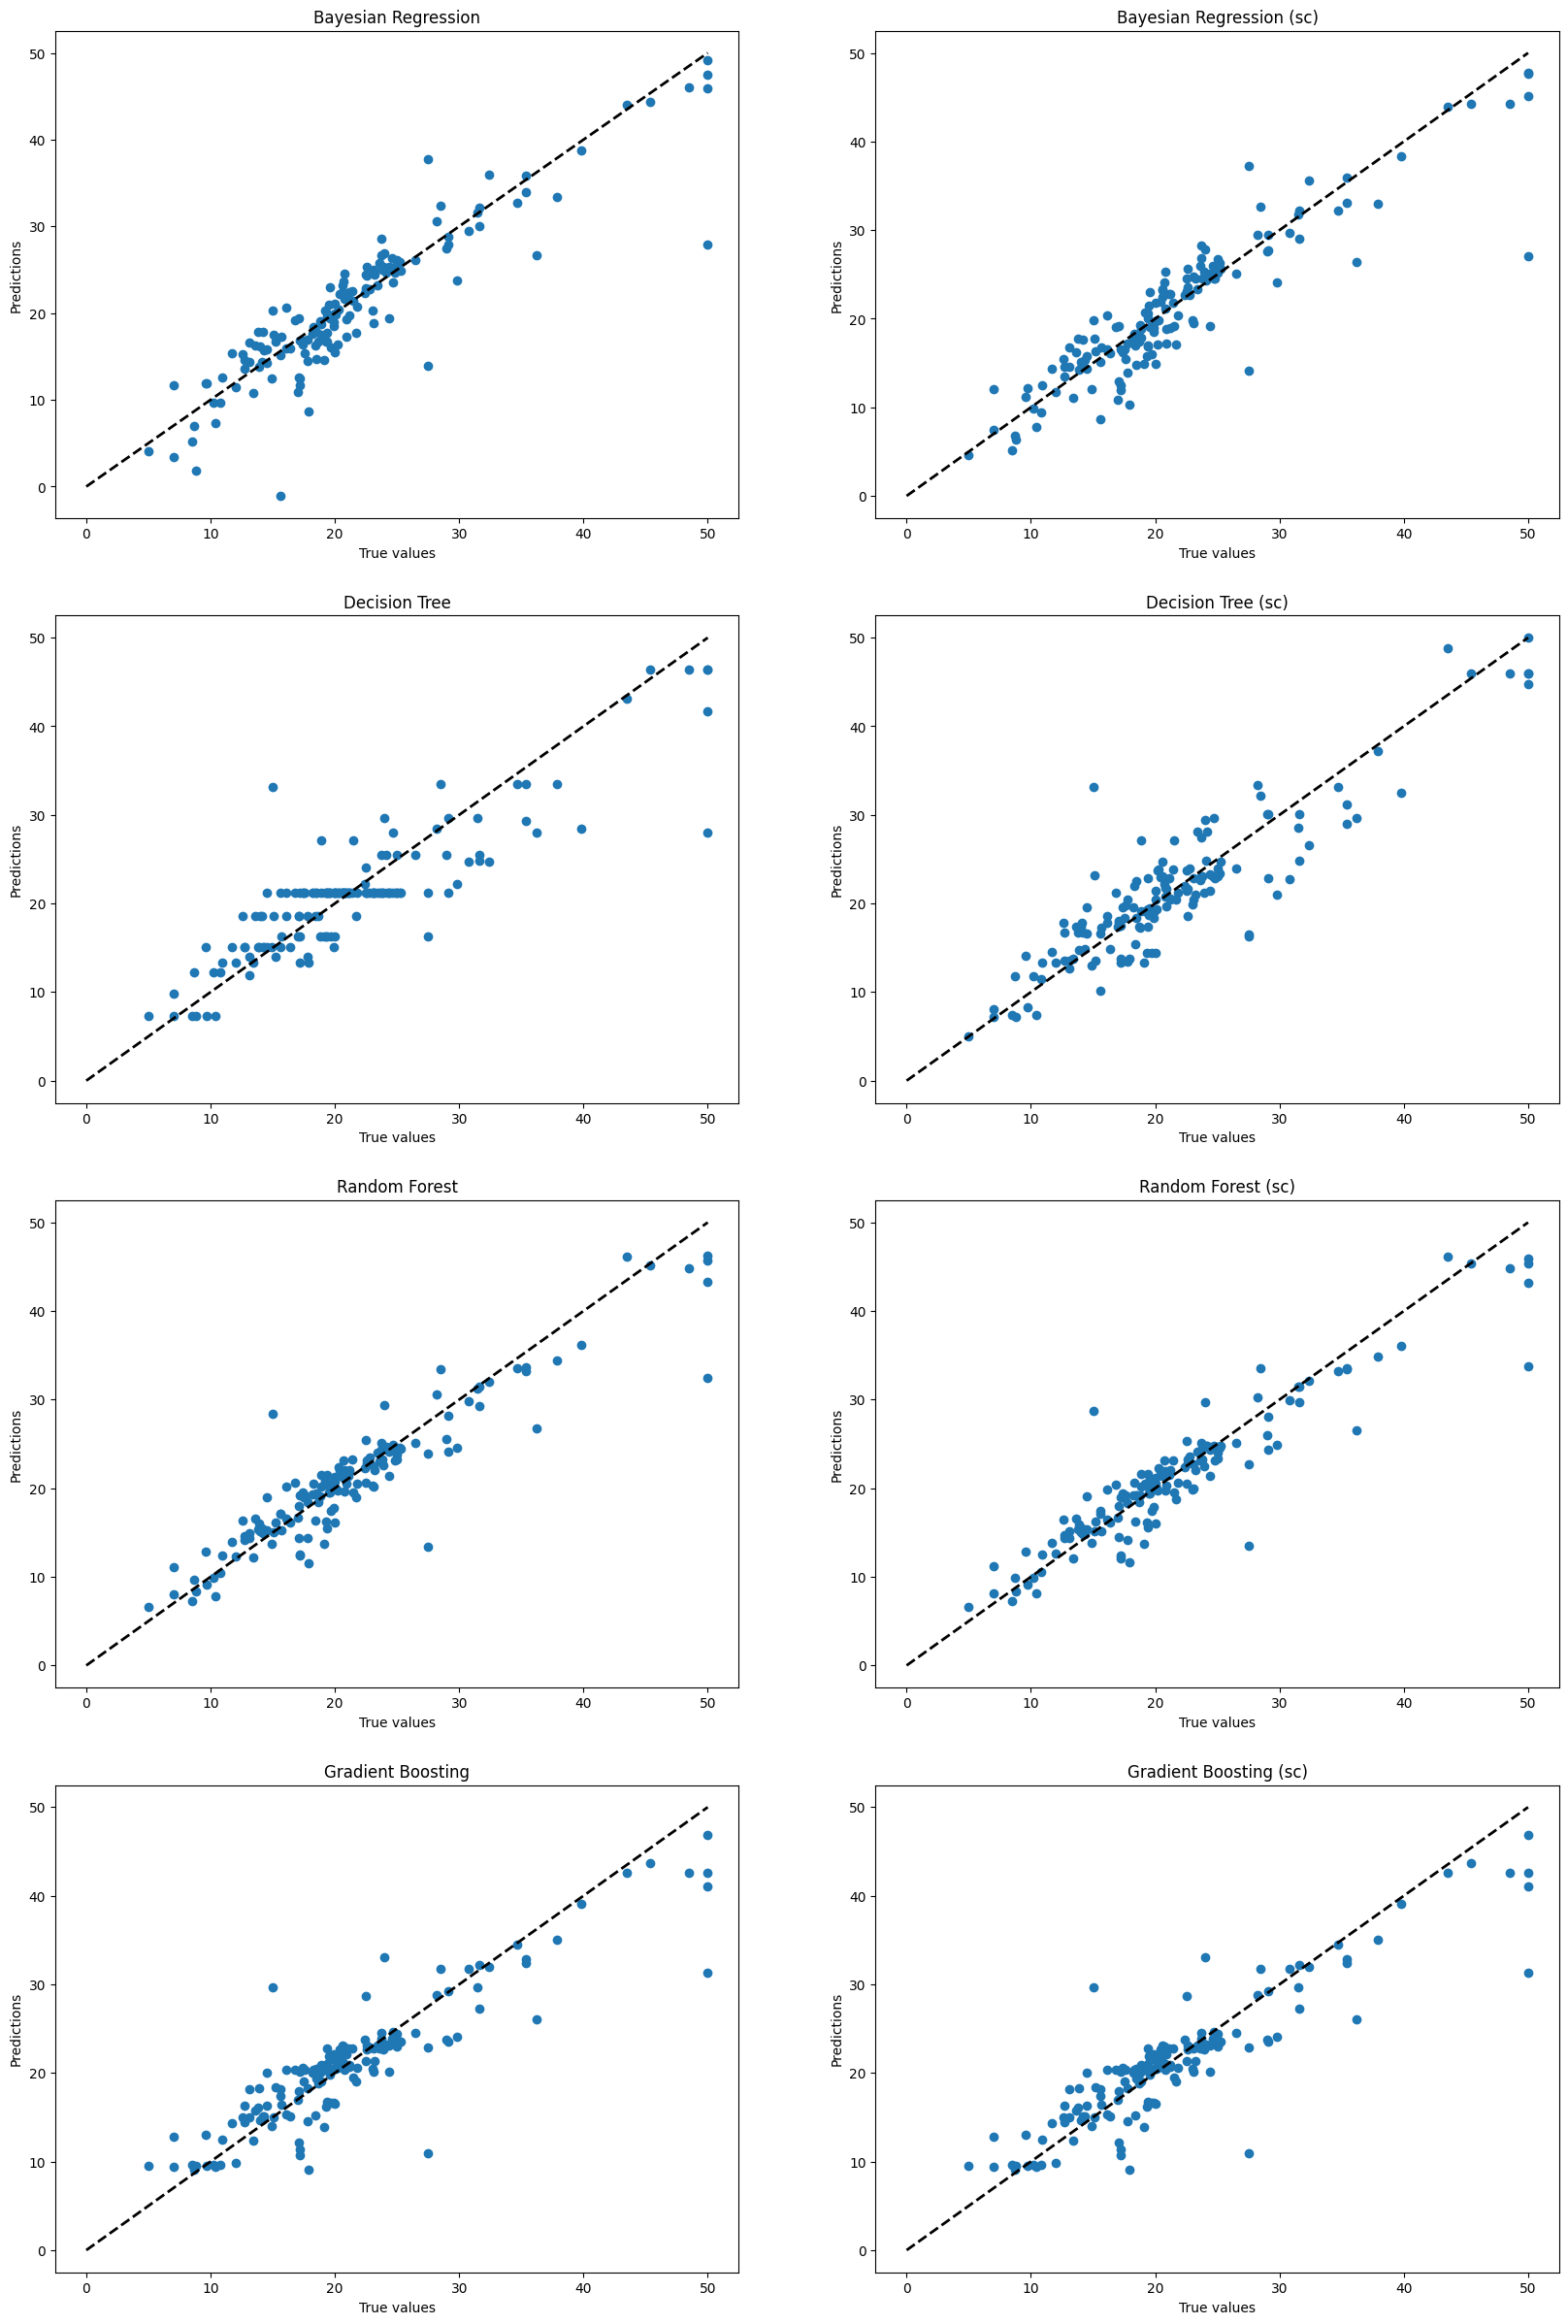

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 2, figsize=(20, 30))

for i, model_name in enumerate(models_gs.keys()):
    model = models_gs[model_name]
    y_pred = model.predict(X_test)

    axs[i, 0].plot([0, y_test.max()], [0, y_test.max()], 'k--', lw=2)
    axs[i, 0].scatter(y_test, y_pred)
    axs[i, 0].set_xlabel('True values')
    axs[i, 0].set_ylabel('Predictions')
    axs[i, 0].set_title(model_name)

for i, model_name in enumerate(models_gs_sc.keys()):
    model = models_gs_sc[model_name]
    y_pred = model.predict(X_test_sc)

    axs[i, 1].plot([0, y_test.max()], [0, y_test.max()], 'k--', lw=2)
    axs[i, 1].scatter(y_test, y_pred)
    axs[i, 1].set_xlabel('True values')
    axs[i, 1].set_ylabel('Predictions')
    axs[i, 1].set_title(model_name)

plt.show()